In [21]:
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.colors import ListedColormap

In [22]:
def gpqrs(P : np.array, d : np.array, a : np.array, RA : np.array, RB : np.array):
    """ Elemento de matriz g_pqrs
    
    P : vector de elementos de la base, P = (p,q,r,s)
    d : vector de coeficientes de expansión (d1, d2, ..., dk)
    a : vector de exponentes orbitales Gaussianos (a1, a2, ..., ak)
    (RA, RB) : coordenada del núcleo (A, B)
    """
    p,q,r,s = P
    nucleos = [RA, RB]

    Mpqrs = 0 # elemento de tensor

    sgn_p = 1 if p in [1,2] else -1 # signo de p
    sgn_q = 1 if q in [1,2] else -1 # signo de q
    sgn_r = 1 if r in [1,2] else -1 # signo de r
    sgn_s = 1 if s in [1,2] else -1 # signo de s

    # coeficientes de normalización (p,q,r,s)
    cp = cPM(d, a, RA, RB, sgn_p)
    cq = cPM(d, a, RA, RB, sgn_q)
    cr = cPM(d, a, RA, RB, sgn_r)
    cs = cPM(d, a, RA, RB, sgn_s)
    
    for A in nucleos:
        for B in nucleos:
            for C in nucleos:
                for D in nucleos:
                    sign = 1
                    if np.array_equal(A, RB):
                        sign *= sgn_p
                    if np.array_equal(B, RB):
                        sign *= sgn_q
                    if np.array_equal(C, RB):
                        sign *= sgn_r
                    if np.array_equal(D, RB):
                        sign *= sgn_s

                    mpqrs = sign*Vmn(d, a, A, B, C, D)
                    Mpqrs += mpqrs
    
    Mpqrs = cp*cq*cr*cs*Mpqrs # multiplicar Mpqrs por coefs. de normalización
        
    return Mpqrs

In [23]:
elementos = set()
terminos = dict()

for p in range(1,5):
    for q in range(1,5):
        for r in range(1,5):
            for s in range(1,5):
                elemento = float(np.round(gpqrs([p,q,r,s], d, a, RA, RB),vdecimal))
                if elemento == 0:
                    continue
                else:
                    if elemento in elementos:
                        terminos[f'{elemento}'].append(f'{p}{q}{r}{s}')
                    else:
                        elementos.add(elemento)
                        terminos[f'{elemento}'] = [f'{p}{q}{r}{s}']

In [24]:
n = 4
matriz = []

for i in range(n):
    matriz.append([])
    for j in range(n):
        matriz[i].append(np.zeros(shape=(n,n)))

factor = 100

for elemento in elementos:
    for termino in terminos[f'{elemento}']:
        p, q, r, s = int(termino[0])-1, int(termino[1])-1, int(termino[2])-1, int(termino[3])-1
        # print(p,q,r,s)
        if elemento == 0.18129:
            matriz[s][r][q][p] = 1*factor
        if elemento == 0.658591:
            matriz[s][r][q][p] = 2*factor
        if elemento == 0.675502:
            matriz[s][r][q][p] = 3*factor
        if elemento == 0.721182:
            matriz[s][r][q][p] = 4*factor

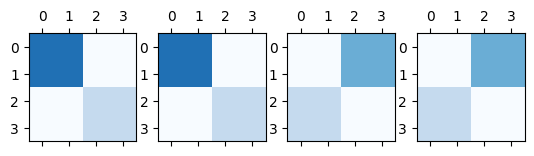

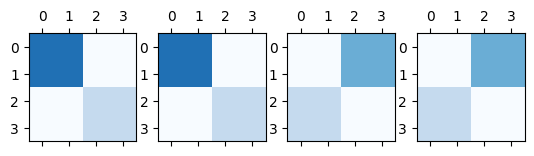

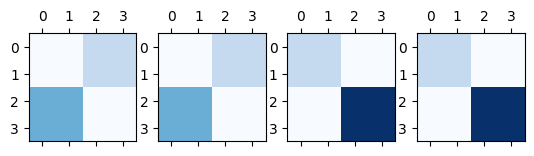

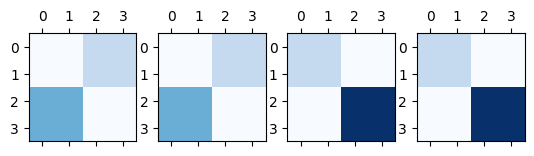

In [25]:
vmax = n*factor

for p in range(n):
    m1 = matriz[p][0]
    m2 = matriz[p][1]
    m3 = matriz[p][2]
    m4 = matriz[p][3]

    fig, (ax1, ax2, ax3, ax4) = plt.subplots(1, n)

    ax1.matshow(m1, cmap=plt.cm.Blues, vmin=0, vmax=vmax)
    ax2.matshow(m2, cmap=plt.cm.Blues, vmin=0, vmax=vmax)
    ax3.matshow(m3, cmap=plt.cm.Blues, vmin=0, vmax=vmax)
    ax4.matshow(m4, cmap=plt.cm.Blues, vmin=0, vmax=vmax)

    # for i in range(n):
    #     for j in range(n):
    #         c = m1[j,i]
    #         if c != 0:
    #             ax1.text(i, j, str(c/factor), va='center', ha='center')
    
    # for i in range(n):
    #     for j in range(n):
    #         c = m2[j,i]
    #         if c != 0:
    #             ax2.text(i, j, str(c/factor), va='center', ha='center')
    
    # for i in range(n):
    #     for j in range(n):
    #         c = m3[j,i]
    #         if c != 0:
    #             ax3.text(i, j, str(c/factor), va='center', ha='center')
    
    # for i in range(n):
    #     for j in range(n):
    #         c = m4[j,i]
    #         if c != 0:
    #           ax4.text(i, j, str(c/factor), va='center', ha='center')

    plt.show()
    fig.savefig(f'matrix/matrix-{p}.png');

In [26]:
import glob
import contextlib
from PIL import Image

In [27]:
# filepaths
fp_in = "matrix/matrix-*.png"
fp_out = "matrix/matrix.gif"

# use exit stack to automatically close opened images
with contextlib.ExitStack() as stack:

    # lazily load images
    imgs = (stack.enter_context(Image.open(f))
            for f in sorted(glob.glob(fp_in)))

    # extract  first image from iterator
    img = next(imgs)

    # https://pillow.readthedocs.io/en/stable/handbook/image-file-formats.html#gif
    img.save(fp=fp_out, format='GIF', append_images=imgs, save_all=True, duration=300, loop=0)